In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 30 kB/s 
     |████████████████████████████████| 199 kB 38.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=933979b1a7f054125f672d5ee9f9956217be60420851f99c663539907ec85fec
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


#Prezentarea Datelor
Un fisier CSV numit "Customers_csv" reprezintă un set fictional de date  unui eșantion de 30 de clienti. Acestea au Carduri de debit si credit la banca "X" in datele prezenta exista si coloana venituri ale clientilor. 

  In acest set de date sunt prezentate următoarele coaloane (ID, Nume, Prenume, Venit, Debit, Credit) 


In [2]:
from time import time
from pyspark import SparkContext
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as pt # interface 
import seaborn as sns # interface
from pyspark.sql import SparkSession

In [3]:
sc = SparkContext(master="local[2]")
print(sc)

<SparkContext master=local[2] appName=pyspark-shell>


In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
path ="/content/drive/MyDrive/Customers_csv.csv"
df = pd.read_csv(path)

In [6]:
df.head(30)

,ID,Nume,Prenume,Venit,Debit,Credit
0,1,Ion,Flavian,3000,1000,300
1,2,Maxim,Vasi,2500,0,6000
2,3,Doru,Dan,4000,300,200
3,4,Marcel,Dorel,6000,200,2000
4,5,Vas,Ilie,250,60,600
5,6,Dragos,Smedi,950,560,200
6,7,Pubel,Vlad,1000,25,1000
7,8,Help,Marcu,20,6000,1000
8,9,Last,Doru,2500,5000,300
9,10,Tarzan,Vlad,1000,954,10


In [7]:
df.columns

Index(['ID', 'Nume', 'Prenume', 'Venit', 'Debit', 'Credit'], dtype='object')

In [8]:
df.describe()

,ID,Venit,Debit,Credit
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,3060.666667,34261.300000,8354.333333
std,8.803408,2299.737516,173010.323452,23551.844892
min,1.000000,0.000000,0.000000,0.000000
25%,8.250000,1125.000000,100.000000,125.000000
50%,15.500000,2850.000000,977.000000,1000.000000
75%,22.750000,4000.000000,4250.000000,2750.000000
max,30.000000,9000.000000,950000.000000,100000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       30 non-null     int64 
 1   Nume     30 non-null     object
 2   Prenume  30 non-null     object
 3   Venit    30 non-null     int64 
 4   Debit    30 non-null     int64 
 5   Credit   30 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ KB


In [10]:
## Arata suma valorilor null
df.isnull().sum()

ID         0
Nume       0
Prenume    0
Venit      0
Debit      0
Credit     0
dtype: int64

In [11]:
type(df['Debit'])

pandas.core.series.Series

Initializarea sesiuni Spark


In [12]:
spark1 = SparkSession.builder.appName('Proiect').getOrCreate()

In [13]:
path ="/content/drive/MyDrive/Customers_csv.csv"
df3 = spark1.read.csv(path , inferSchema=True,header=True)

In [14]:
df3.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Nume: string (nullable = true)
 |-- Prenume: string (nullable = true)
 |-- Venit: double (nullable = true)
 |-- Debit: integer (nullable = true)
 |-- Credit: integer (nullable = true)



In [15]:
# Suma statisticilor
df3.summary().show()

+-------+-----------------+-----+-------+------------------+-----------------+-----------------+
|summary|               ID| Nume|Prenume|             Venit|            Debit|           Credit|
+-------+-----------------+-----+-------+------------------+-----------------+-----------------+
|  count|               30|   30|     30|                30|               30|               30|
|   mean|             15.5| null|   null|3060.6666666666665|          34261.3|8354.333333333334|
| stddev|8.803408430829505| null|   null| 2299.737516256618|173010.3234522288|23551.84489198441|
|    min|                1|Adela|Atanase|               0.0|                0|                0|
|    25%|                8| null|   null|            1000.0|              100|              100|
|    50%|               15| null|   null|            2700.0|              954|             1000|
|    75%|               23| null|   null|            4000.0|             5000|             3000|
|    max|               30|  V

In [16]:
#Sa se afiseze clienti cu venitul mai mare de 3005 lei.
df3.filter("Venit > 3005").select(['Nume','Prenume']).show()

+-------+--------+
|   Nume| Prenume|
+-------+--------+
|   Doru|     Dan|
| Marcel|   Dorel|
| Teodor|  Marina|
|  Magda| Rozalia|
|  Anton|Vasilica|
|Bogdana|  Miruna|
| Miruna| Iuliana|
| Florin|   Eliza|
|  Adela|  Dorian|
|   Toma|Catrinel|
|   Toma| Felicia|
|  Tudor|  Denisa|
|  Diana|   Felix|
+-------+--------+



In [17]:
#suma maxima de debit
df3.agg({'Debit':'sum'}).show()

+----------+
|sum(Debit)|
+----------+
|   1027839|
+----------+



In [18]:
#Ordonarea crescatoare a veniturilor clientilor
df3.orderBy('Venit').show()

+---+---------+--------+------+-----+------+
| ID|     Nume| Prenume| Venit|Debit|Credit|
+---+---------+--------+------+-----+------+
| 16|    Lidia|   Marta|   0.0|    0|     0|
| 17|    Andra| Emanuel|   0.0|  100|  9000|
|  8|     Help|   Marcu|  20.0| 6000|  1000|
| 27|   Roxana|   Maria| 100.0| 9500|  2000|
|  5|      Vas|    Ilie| 250.0|   60|   600|
|  6|   Dragos|   Smedi| 950.0|  560|   200|
|  7|    Pubel|    Vlad|1000.0|   25|  1000|
| 10|   Tarzan|    Vlad|1000.0|  954|    10|
| 15|  Petrica|  Eduard|1500.0| 2000|  3000|
| 22|    David|   Ioana|1500.0|    0|     0|
|  2|    Maxim|    Vasi|2500.0|    0|  6000|
| 13|   Angela|Gheorghe|2500.0| 5000|  6000|
|  9|     Last|    Doru|2500.0| 5000|   300|
| 21|    Maria| Atanase|2500.0|  100|   100|
| 29|  Mihaela|   Dorin|2700.0|   10|  1000|
|  1|      Ion| Flavian|3000.0| 1000|   300|
| 25|Alexandra|  Costin|3000.0|  100| 87600|
| 20|   Florin|   Eliza|3300.0|  600|     0|
| 11|   Teodor|  Marina|3500.0| 1000|  1200|
| 26|     

In [19]:
df2 = spark1.read.csv(path,inferSchema=True,header=True)

In [20]:
df2.head()

Row(ID=1, Nume='Ion', Prenume='Flavian', Venit=3000.0, Debit=1000, Credit=300)

In [21]:
df2.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Nume: string (nullable = true)
 |-- Prenume: string (nullable = true)
 |-- Venit: double (nullable = true)
 |-- Debit: integer (nullable = true)
 |-- Credit: integer (nullable = true)



# PyspakSQL

In [22]:
df2.createOrReplaceTempView("SQL")

In [23]:
# Sa se afiseze primi 5 clienti
result = spark1.sql("SELECT * FROM SQL")
result.show(5)

+---+------+-------+------+-----+------+
| ID|  Nume|Prenume| Venit|Debit|Credit|
+---+------+-------+------+-----+------+
|  1|   Ion|Flavian|3000.0| 1000|   300|
|  2| Maxim|   Vasi|2500.0|    0|  6000|
|  3|  Doru|    Dan|4000.0|  300|   200|
|  4|Marcel|  Dorel|6000.0|  200|  2000|
|  5|   Vas|   Ilie| 250.0|   60|   600|
+---+------+-------+------+-----+------+
only showing top 5 rows



In [24]:
# Sa se afize clienti cu numele "Magda"
spark1.sql("SELECT * FROM SQL WHERE Nume='Magda'").show(100)

+---+-----+-------+------+-----+------+
| ID| Nume|Prenume| Venit|Debit|Credit|
+---+-----+-------+------+-----+------+
| 12|Magda|Rozalia|4000.0| 9000|  1000|
+---+-----+-------+------+-----+------+



In [25]:
#Venit mediu al clientilor
spark1.sql("SELECT AVG(Venit) Venit FROM  SQL ").show()

+------------------+
|             Venit|
+------------------+
|3060.6666666666665|
+------------------+



In [26]:
# Sa se afiseze clienti cu nume de familie distincte
spark1.sql("SELECT COUNT(DISTINCT(Nume)) FROM  SQL ").show()

+--------------------+
|count(DISTINCT Nume)|
+--------------------+
|                  29|
+--------------------+



Plot and Scatter

In [27]:
df2 = df.round(decimals=0).astype(object)

In [28]:
df2.describe()

,ID,Nume,Prenume,Venit,Debit,Credit
count,30,30,30,30,30,30
unique,30,29,29,18,20,18
top,1,Toma,Vlad,2500,2000,1000
freq,1,2,2,4,4,5


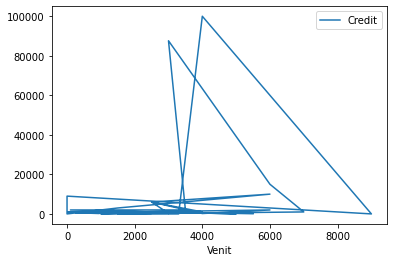

In [29]:
df.plot("Venit", "Credit")

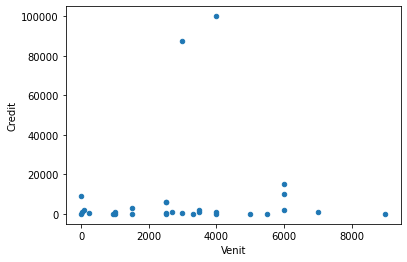

In [30]:
df.plot.scatter("Venit", "Credit")


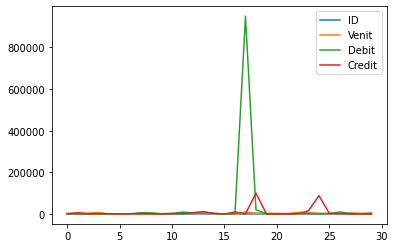

In [31]:
df.plot()

# Linear regresion


In [ ]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

Prepararea datelor

In [ ]:
df3.columns

['ID', 'Nume', 'Prenume', 'Venit', 'Debit', 'Credit']

In [ ]:
assembler = VectorAssembler( 
    inputCols = ["Venit", "Debit"],
    outputCol="features")


In [ ]:
output = assembler.transform(df3)

In [ ]:
#Afisarea coloanei features
output.select("features").head(3)

[Row(features=DenseVector([3000.0, 1000.0])),
 Row(features=DenseVector([2500.0, 0.0])),
 Row(features=DenseVector([4000.0, 300.0]))]

In [ ]:
output.show()

+---+-------+--------+------+------+------+-----------------+
| ID|   Nume| Prenume| Venit| Debit|Credit|         features|
+---+-------+--------+------+------+------+-----------------+
|  1|    Ion| Flavian|3000.0|  1000|   300|  [3000.0,1000.0]|
|  2|  Maxim|    Vasi|2500.0|     0|  6000|     [2500.0,0.0]|
|  3|   Doru|     Dan|4000.0|   300|   200|   [4000.0,300.0]|
|  4| Marcel|   Dorel|6000.0|   200|  2000|   [6000.0,200.0]|
|  5|    Vas|    Ilie| 250.0|    60|   600|     [250.0,60.0]|
|  6| Dragos|   Smedi| 950.0|   560|   200|    [950.0,560.0]|
|  7|  Pubel|    Vlad|1000.0|    25|  1000|    [1000.0,25.0]|
|  8|   Help|   Marcu|  20.0|  6000|  1000|    [20.0,6000.0]|
|  9|   Last|    Doru|2500.0|  5000|   300|  [2500.0,5000.0]|
| 10| Tarzan|    Vlad|1000.0|   954|    10|   [1000.0,954.0]|
| 11| Teodor|  Marina|3500.0|  1000|  1200|  [3500.0,1000.0]|
| 12|  Magda| Rozalia|4000.0|  9000|  1000|  [4000.0,9000.0]|
| 13| Angela|Gheorghe|2500.0|  5000|  6000|  [2500.0,5000.0]|
| 14|  A

In [ ]:
#Retinearea coloanelor features si credit
final_data = output.select("features","Credit" )

In [ ]:
#Diviziune de train-test 70% - 30%
train_data,test_data = final_data.randomSplit([0.7, 0.3])

In [ ]:
#Afisearea statistici asupra datelor de training
train_data.describe().show()

+-------+-----------------+
|summary|           Credit|
+-------+-----------------+
|  count|               19|
|   mean|12885.78947368421|
| stddev|28884.66823531694|
|    min|                0|
|    max|           100000|
+-------+-----------------+



In [ ]:
#Afiseara statistici asupra datelor de test
test_data.describe().show()

+-------+-----------------+
|summary|           Credit|
+-------+-----------------+
|  count|               11|
|   mean|527.2727272727273|
| stddev|641.8736777449424|
|    min|                0|
|    max|             2000|
+-------+-----------------+



In [ ]:
#Crearea unui model de regresie liniara
lr = LinearRegression(labelCol = "Credit")

In [ ]:
# Antrenarea modelului
lrModel = lr.fit(train_data)

In [ ]:
# Afisearea coeficientilor si interceptia pentru regresia liniara
print("Coefficient: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficient: [2.245388668377892,2.8407725267867163] Intercept: -2402.7232690022474


In [ ]:
#Evaluarea modelului pe datele de test
test_result = lrModel.evaluate(test_data)

In [ ]:
#Valorile reziduale
test_result.residuals.show()

+-------------------+
|          residuals|
+-------------------+
| 2402.7232690022474|
| -1121.228580957311|
|-2542.7623899301716|
| -2688.233860885928|
| -6874.215262918145|
| -7231.063162545334|
| -31145.78414558977|
|  -9942.13758287976|
| -9637.763246622446|
| -17996.54246321643|
|-2716539.6751937796|
+-------------------+



In [ ]:
#Datele de test neetichetate
ulabeled_data = test_data.select("features")

In [ ]:
# Aplicati modelul obtinut anterior pe datele de test neetichetate
predictions = lrModel.transform(ulabeled_data)

In [ ]:
#Afiseara predictilor obtinute
predictions.show()


+-----------------+-------------------+
|         features|         prediction|
+-----------------+-------------------+
|        (2,[],[])|-2402.7232690022474|
|    [950.0,560.0]|  1321.228580957311|
|   [1000.0,954.0]| 2552.7623899301716|
|    [2700.0,10.0]|  3688.233860885928|
|  [3000.0,1000.0]|  7174.215262918145|
|   [4000.0,300.0]|  7431.063162545334|
|  [4000.0,9000.0]|  32145.78414558977|
|    [5500.0,30.0]|  10032.13758287976|
|   [6000.0,200.0]| 11637.763246622446|
|  [7000.0,2000.0]|  18996.54246321643|
|[9000.0,950000.0]| 2716539.6751937796|
+-----------------+-------------------+



In [ ]:
#Afiseara si de alte informati din test_result 
print("RMSE: {}".format(test_result.rootMeanSquaredError))
print("MSE: {}".format(test_result.meanSquaredError))
print("R2: {}".format(test_result.r2))

RMSE: 819156.647272456
MSE: 671017612770.6508
R2: -1791542.972560773


#Cluster

In [ ]:
dataTypeSeries = df3.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
[('ID', 'int'), ('Nume', 'string'), ('Prenume', 'string'), ('Venit', 'double'), ('Debit', 'int'), ('Credit', 'int')]


In [ ]:
df3.show()

+---+-------+--------+------+------+------+
| ID|   Nume| Prenume| Venit| Debit|Credit|
+---+-------+--------+------+------+------+
|  1|    Ion| Flavian|3000.0|  1000|   300|
|  2|  Maxim|    Vasi|2500.0|     0|  6000|
|  3|   Doru|     Dan|4000.0|   300|   200|
|  4| Marcel|   Dorel|6000.0|   200|  2000|
|  5|    Vas|    Ilie| 250.0|    60|   600|
|  6| Dragos|   Smedi| 950.0|   560|   200|
|  7|  Pubel|    Vlad|1000.0|    25|  1000|
|  8|   Help|   Marcu|  20.0|  6000|  1000|
|  9|   Last|    Doru|2500.0|  5000|   300|
| 10| Tarzan|    Vlad|1000.0|   954|    10|
| 11| Teodor|  Marina|3500.0|  1000|  1200|
| 12|  Magda| Rozalia|4000.0|  9000|  1000|
| 13| Angela|Gheorghe|2500.0|  5000|  6000|
| 14|  Anton|Vasilica|6000.0|  9000| 10000|
| 15|Petrica|  Eduard|1500.0|  2000|  3000|
| 16|  Lidia|   Marta|   0.0|     0|     0|
| 17|  Andra| Emanuel|   0.0|   100|  9000|
| 18|Bogdana|  Miruna|9000.0|950000|     0|
| 19| Miruna| Iuliana|4000.0| 20000|100000|
| 20| Florin|   Eliza|3300.0|   

In [ ]:
from pyspark.ml import clustering


In [ ]:
vec_assembler = VectorAssembler(inputCols = ["Venit", "Debit","features"], outputCol='features_cluster')

In [ ]:
Data_forVec = output.select("Venit", "Debit","features")

In [ ]:
Data_forVec.show()

+------+------+-----------------+
| Venit| Debit|         features|
+------+------+-----------------+
|3000.0|  1000|  [3000.0,1000.0]|
|2500.0|     0|     [2500.0,0.0]|
|4000.0|   300|   [4000.0,300.0]|
|6000.0|   200|   [6000.0,200.0]|
| 250.0|    60|     [250.0,60.0]|
| 950.0|   560|    [950.0,560.0]|
|1000.0|    25|    [1000.0,25.0]|
|  20.0|  6000|    [20.0,6000.0]|
|2500.0|  5000|  [2500.0,5000.0]|
|1000.0|   954|   [1000.0,954.0]|
|3500.0|  1000|  [3500.0,1000.0]|
|4000.0|  9000|  [4000.0,9000.0]|
|2500.0|  5000|  [2500.0,5000.0]|
|6000.0|  9000|  [6000.0,9000.0]|
|1500.0|  2000|  [1500.0,2000.0]|
|   0.0|     0|        (2,[],[])|
|   0.0|   100|      [0.0,100.0]|
|9000.0|950000|[9000.0,950000.0]|
|4000.0| 20000| [4000.0,20000.0]|
|3300.0|   600|   [3300.0,600.0]|
+------+------+-----------------+
only showing top 20 rows



In [ ]:
final_data = vec_assembler.transform(Data_forVec)

In [ ]:
#Scalarea datelor
from pyspark.ml.feature import StandardScaler

In [ ]:
scaler = StandardScaler(inputCol="features_cluster", outputCol="scaledFeatures", withStd=True, withMean=False)

In [ ]:
# Calculul statisticilor de sumarizare antrenând StandardScaler
scalerModel = scaler.fit(final_data)

In [ ]:
# Normalizarea fiecărei caracteristici astfel încât să aibă deviația standard unitară.
final_data = scalerModel.transform(final_data)

In [ ]:
# Antrenarea unui model k-means.
from pyspark.ml.clustering import KMeans
kmeans = KMeans(featuresCol='scaledFeatures',k=3)
model = kmeans.fit(final_data)

In [ ]:
# Evaluarea clustering-ului 
# Depreciat:
#wssse = model.computeCost(final_data)
#print("Within Set Sum of Squared Errors = " + str(wssse))

#Evaluați modelul
from pyspark.ml.evaluation import ClusteringEvaluator
predictions = model.transform(final_data)

evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Scorul silhouette : " + str(silhouette));


Scorul silhouette : 0.3967315045276717


In [ ]:
# Afișare rezultate.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[3.9134901  5.49100181 3.9134901  5.49100181]
[0.76791372 0.0096263  0.76791372 0.0096263 ]
[2.2949479  0.02859817 2.2949479  0.02859817]


In [ ]:
model.transform(final_data).select('prediction').show()

+----------+
|prediction|
+----------+
|         1|
|         1|
|         2|
|         2|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         2|
|         1|
|         2|
|         1|
|         1|
|         1|
|         0|
|         2|
|         1|
+----------+
only showing top 20 rows



#Data Pipeline

In [32]:
df2.head(30)

,ID,Nume,Prenume,Venit,Debit,Credit
0,1,Ion,Flavian,3000,1000,300
1,2,Maxim,Vasi,2500,0,6000
2,3,Doru,Dan,4000,300,200
3,4,Marcel,Dorel,6000,200,2000
4,5,Vas,Ilie,250,60,600
5,6,Dragos,Smedi,950,560,200
6,7,Pubel,Vlad,1000,25,1000
7,8,Help,Marcu,20,6000,1000
8,9,Last,Doru,2500,5000,300
9,10,Tarzan,Vlad,1000,954,10


In [33]:
#Drop nume si prenume 

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class NameDropper (BaseEstimator, TransformerMixin):

    def fit (self, X, y=None):
      return self
    def transform (self, X):
      return X.drop(['Nume','Prenume'], axis=1 )
   

dropper = NameDropper()

pipe = Pipeline ([("dropper", NameDropper())])

pipe.fit_transform(df2)


,ID,Venit,Debit,Credit
0,1,3000,1000,300
1,2,2500,0,6000
2,3,4000,300,200
3,4,6000,200,2000
4,5,250,60,600
5,6,950,560,200
6,7,1000,25,1000
7,8,20,6000,1000
8,9,2500,5000,300
9,10,1000,954,10


# Clasificarea cifrelor scrise de mână
Clasificare Deep learning - Neural network

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
objects = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

11501568/11490434 [==============================] - 0s 0us/step


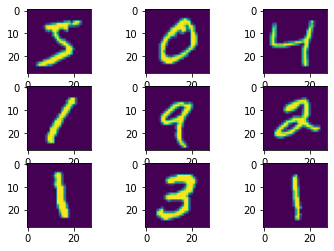

In [ ]:
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(training_images[i])

In [ ]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2609 - accuracy: 0.9257
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1171 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0812 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0620 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0473 - accuracy: 0.9856


In [ ]:
print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 1s 3ms/step - loss: 0.0744 - accuracy: 0.9769
[0.07444552332162857, 0.9768999814987183]


4


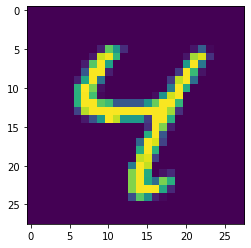

In [ ]:
import random
randomNum = random.randint(0,9)
plt.imshow(test_images[randomNum])
prediction=model.predict(test_images)
print(np.argmax(prediction[randomNum]))

# Cats VS Dogs
Convolutional neural network *italicized text*
Dataset information
The training archive contains 25,000 images of dogs and cats. Train the algorithm on these files and predict the labels of test1.zip
(1 = dog, 0 = cat)

Download Dataset

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-06-21 12:01:12--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.73.0.105, 2600:1406:3c:483::e59, 2600:1406:3c:49b::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.73.0.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip.1’

kagglecatsanddogs_5 100%[===================>] 786.67M  70.9MB/s    in 11s     

2022-06-21 12:01:24 (68.6 MB/s) - ‘kagglecatsanddogs_5340.zip.1’ saved [824887076/824887076]



Unzip the dataset

In [ ]:
!unzip kagglecatsanddogs_5340.zip

Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetIm

Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

Create dataframe for input and output

In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", class_name, path))
  print(input_path[0], label[0])

PetImages/Cat/5990.jpg 0
PetImages/Cat/5990.jpg 0


In [ ]:

df4 = pd.DataFrame()
df4['images'] = input_path
df4['label'] = label
df4 = df4.sample(frac=1).reset_index(drop=True)
df4.head()

,images,label
0,PetImages/Dog/1761.jpg,1
1,PetImages/Cat/7704.jpg,0
2,PetImages/Dog/5911.jpg,1
3,PetImages/Cat/2886.jpg,0
4,PetImages/Cat/4455.jpg,0


In [ ]:
# fiind non-jpg files
for i in df4['images']:
  if '.jpg' not in i:
    print (i)

In [ ]:
#List of non-image type files and corrupted images
import PIL
l = []
for image in df4['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/666.jpg',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db']

In [ ]:
# delete db files
df = df4[df4['images']!='PetImages/Dog/Thumbs.db']
df = df4[df4['images']!='PetImages/Cat/Thumbs.db']
df = df4[df4['images']!='PetImages/Cat/666.jpg']
df = df4[df4['images']!='PetImages/Dog/11702.jpg']
len(df)


24998

Exploatory Data Analysis

In [ ]:
# to display grid of images	
plt.figure(figsize=(25,25))	
temp = df4[df4['label']==1]['images']	
start = random.randint(0, len(temp))
files = temp[start:start+25]	
for index, file in enumerate(files):	
    plt.subplot(5,5, index+1)	
    img = load_img(file)	
    img = np.array(img)	
    plt.imshow(img)	
    plt.title('Dogs')	
    plt.axis('off')

<Figure size 1800x1800 with 0 Axes>

In [ ]:
	# to display grid of images	
plt.figure(figsize=(25,25))	
temp = df4[df4['label']==0]['images']	
start = random.randint(0, len(temp))	
files = temp[start:start+25]	
for index, file in enumerate(files):	
    plt.subplot(5,5, index+1)	
    img = load_img(file)	
    img = np.array(img)	
    plt.imshow(img)	
    plt.title('Cats')	
    plt.axis('off') 

<Figure size 1800x1800 with 0 Axes>

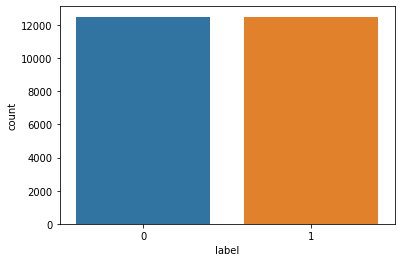

In [ ]:
import seaborn as sns
sns.countplot(df4['label'])

Create data generator for the images

In [ ]:
df4['label'] = df4['label'].astype('str')
df.head()

,images,label
0,PetImages/Dog/1761.jpg,1
1,PetImages/Cat/7704.jpg,0
2,PetImages/Dog/5911.jpg,1
3,PetImages/Cat/2886.jpg,0
4,PetImages/Cat/4455.jpg,0


In [ ]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19997 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Model Creation

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
]) 

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)      

In [ ]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 408s 10s/step - loss: 0.6606 - accuracy: 0.6023 - val_loss: 0.6252 - val_accuracy: 0.6498
Epoch 2/10
40/40 [==============================] - 411s 10s/step - loss: 0.6107 - accuracy: 0.6633 - val_loss: 0.5813 - val_accuracy: 0.6940
Epoch 3/10
40/40 [==============================] - 410s 10s/step - loss: 0.5685 - accuracy: 0.7082 - val_loss: 0.5480 - val_accuracy: 0.7124
Epoch 4/10
40/40 [==============================] - 410s 10s/step - loss: 0.5464 - accuracy: 0.7225 - val_loss: 0.5250 - val_accuracy: 0.7418
Epoch 5/10
40/40 [==============================] - 409s 10s/step - loss: 0.5296 - accuracy: 0.7363 - val_loss: 0.4936 - val_accuracy: 0.7636
Epoch 6/10
40/40 [==============================] - 411s 10s/step - loss: 0.5247 - accuracy: 0.7370 - val_loss: 0.4970 - val_accuracy: 0.7578
Epoch 7/10
40/40 [==============================] - 409s 10s/step - loss: 0.5075 - accuracy: 0.7523 - val_loss: 0.4747 - val_accuracy: 0.7732
Epoch 

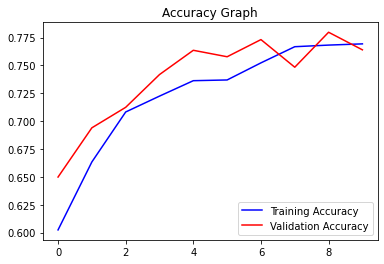

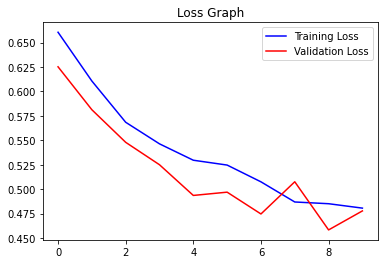

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()